# Лабораторная работа №7

- Написать собственные реализации rejection sampling и метода Метрополиса–Гастингса
- 2 тестовые функции плотности (отнормировать непрерывные функции)
- насэмплировать по 1000 точек, посмотреть характерные смещения

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Rejection sampling

In [151]:
def rejection_sampling(count, test_func):
  res = []
  out_res = []

  min_border = 0
  max_border = 2

  while True:
    x = np.random.uniform(min_border, max_border)
    y = np.random.normal()
    p_x = test_func(x)
    
    if ((p_x > y) and y>0):
      res.append([x, y])
    else:
      out_res.append([x, y])

    if len(res) == count:
      break

  return res, out_res

## 2. Метод Метрополиса-Гастингса

In [295]:
def metropolis_gastings(test_func, count=1000):
  x, y = 0.5, 0.5
  samples = np.zeros((count, 1))
  samples_y = np.zeros((count,1))

  for i in range(count):
    x_star, y_star = np.array(x) + np.random.normal(size=2)
    denominator = test_func(x)
    if denominator == 0: continue
    if np.random.rand() < (test_func(x_star) / denominator):
      x, y = x_star, y_star
    samples[i] = np.array(x)
    samples_y[i] = np.array(y)

  return samples, samples_y

## 3. Тестовые функции

$$ 6x^{2}-2x , 0<x<1 $$

In [71]:
def test_func_1(x):
  return 6*x**2-2*x if 0 < x < 1 else 0

$$ \frac{sin(x) + cos(x)}{2}, 0 < x < \frac{\pi}{2} $$

In [55]:
def test_func_2(x):
  return (np.sin(x)+np.cos(x))/2 if 0 < x < np.pi/2 else 0

## 4. Применение методов на тестовых функциях

In [359]:
def do_plot_rejection_fnc(test_func):
  fig, sp = plt.subplots(figsize=(25,10))
  x = np.linspace(-1, 2)

  y = [test_func(x[i]) for i in range(x.shape[0])]
  
  points_in, points_out = rejection_sampling(1000, test_func)
  x_in = []
  y_in = []
  x_out = []
  y_out = []

  for i in range(len(points_in)):
    x_in.append(points_in[i][0])
    y_in.append(points_in[i][1])
  for i in range(len(points_out)):
    x_out.append(points_out[i][0])
    y_out.append(points_out[i][1])

  sp.scatter(x_in, y_in, color='orange', s=3)
  sp.scatter(x_out, y_out, color='green', s=3)
  sp.plot(x,y)
  plt.xlim([-0.25, 2])
  plt.ylim([0, 4])
  plt.show()

In [355]:
def do_plot_metropolis_gastings_fnc(test_func):
  fig, sp = plt.subplots(figsize=(25,10))
  x = np.linspace(-1,2)

  y = [test_func(x[i]) for i in range(x.shape[0])]

  points_x, points_y = metropolis_gastings(test_func, 1000)
  sp.hist(points_x, 30, density=True, color='orange')
  sp.plot(x,y)
  plt.xlim([0, 1.75])
  plt.ylim([0, 4])
  plt.show()

#### Применение rejection sampling

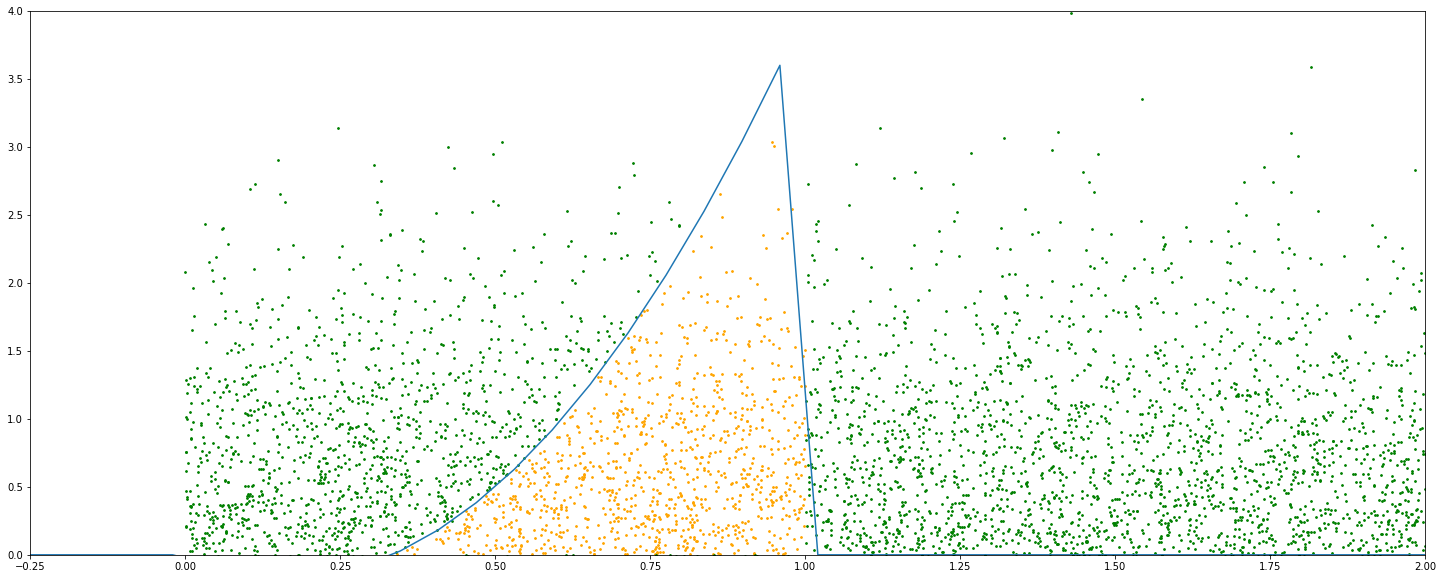

In [210]:
do_plot_rejection_fnc(test_func_1)

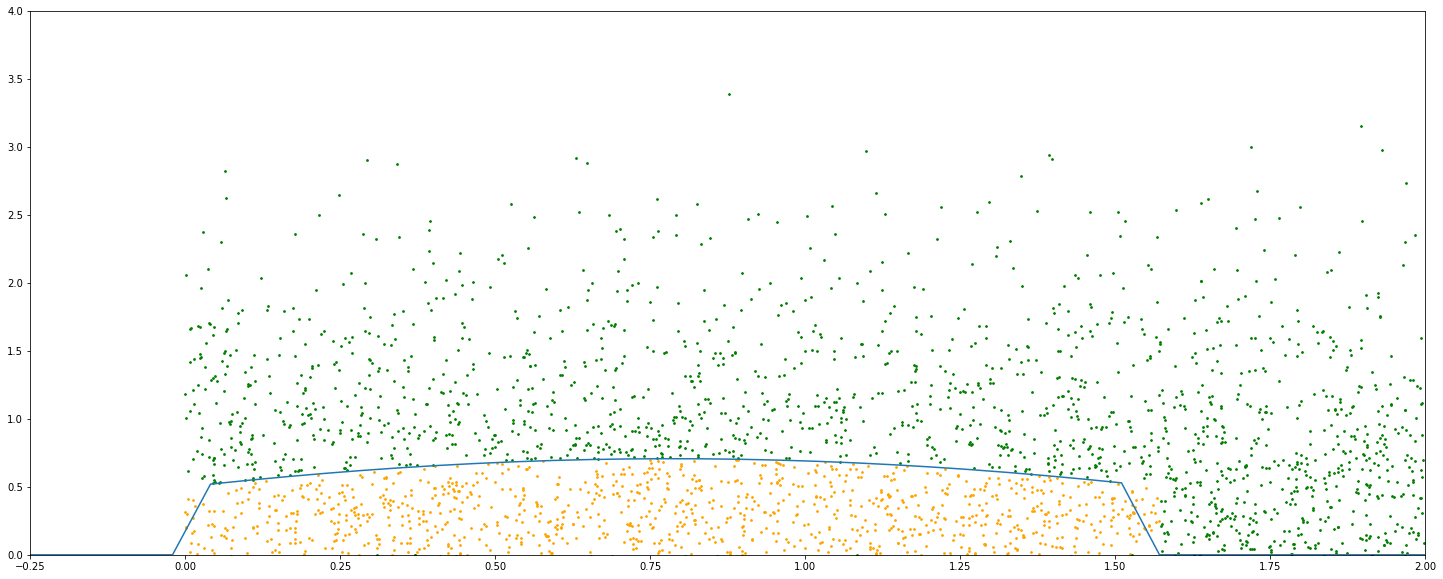

In [212]:
do_plot_rejection_fnc(test_func_2)

#### Применение метода Метрополиса-Гастингса

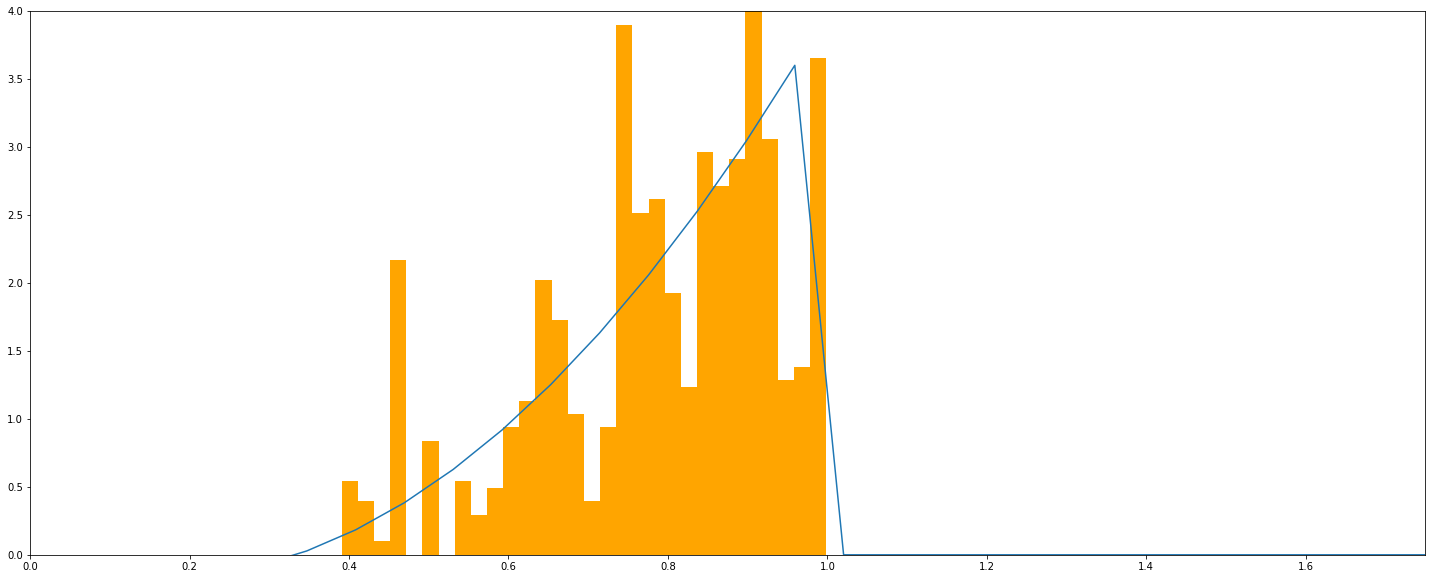

In [358]:
do_plot_metropolis_gastings_fnc(test_func_1)

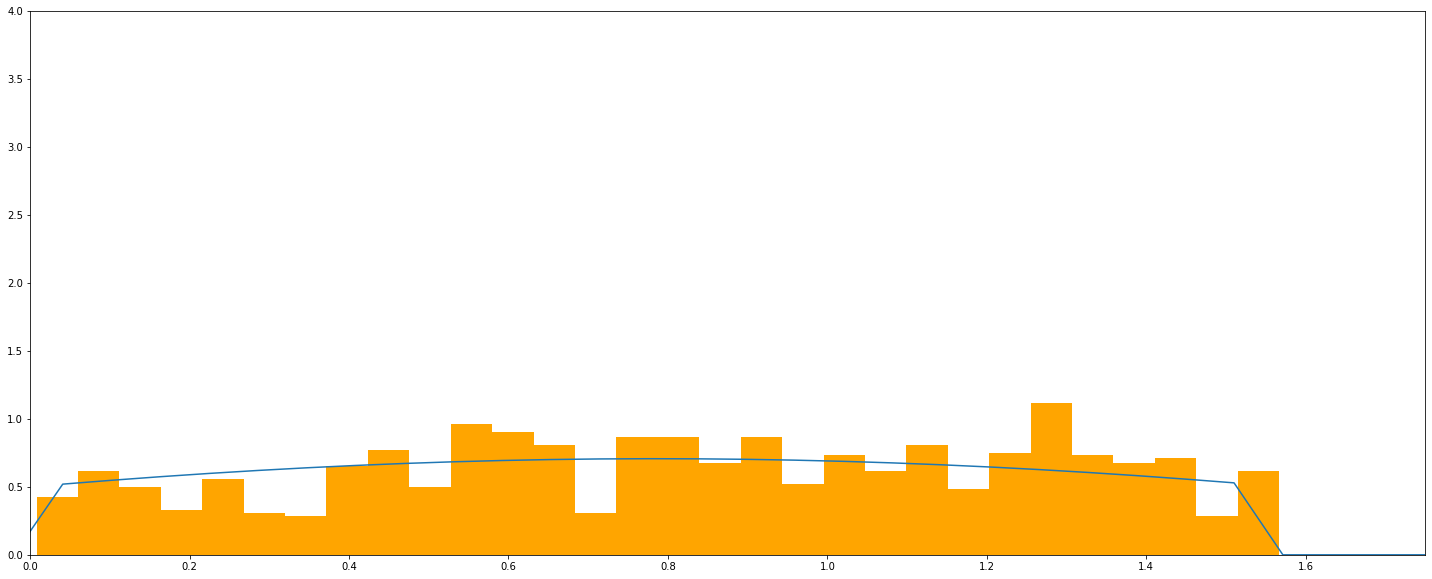

In [357]:
do_plot_metropolis_gastings_fnc(test_func_2)